In [14]:
from forecaster import Forecaster as FC
from evaluation import Evaluation as EVAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from metric_funcs import mape

%matplotlib inline

### Model testing.

#### 1) Init Forecaster class.


In [202]:
forecaster = FC('../data/test_cleaned.csv', max_features=6, n_estimators=500)

# Train dates
train_start = datetime(2013,11,01,0,0)
train_end = datetime(2013,11,20,23,45)

# Test dates
test_start = datetime(2013,11,21,0,0)
test_end = test_start + pd.Timedelta('1D')

# Vectorize dataframes
forecaster.vectorize(train_start, train_end, test_start, test_end)

### 2) Init Evaluation class with forecasting as input. 

In [203]:
forecaster.model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [204]:
Eval = EVAL(forecaster)

### Compute score

In [205]:
Eval.get_scores(mape)

The MAPE for this model is:  1.88803979181


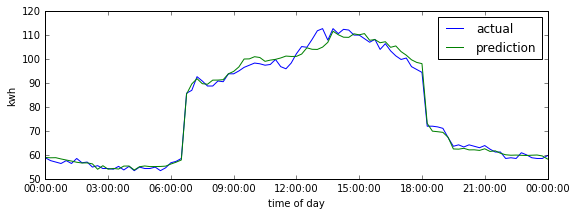

In [207]:
# plot comparison
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(1,1,1)
ax.plot(forecaster.test_index,forecaster.y_test, label = 'actual')
ax.plot(forecaster.test_index,Eval.y_pred, label = 'prediction')

ax.set_ylabel('kwh')
ax.set_xlabel('time of day')

plt.legend()